<a href="https://colab.research.google.com/github/amatyaagrata/ConceptandTechnologyofAI/blob/main/workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXERCISE 1: SENTIMENT ANALYSIS WITH NAIVE BAYES
Loading dataset...

Preprocessing reviews...
Sample original review: This movie was absolutely fantastic! Loved every moment.
Sample processed review: movi absolut fantast love everi moment

Splitting dataset...
Training set size: 6
Testing set size: 2

Creating Bag-of-Words model...
Vocabulary size: 31

Training Naive Bayes classifier...

MODEL EVALUATION
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667
ROC-AUC Score: 0.0000

Confusion Matrix:
[[0 1]
 [0 1]]


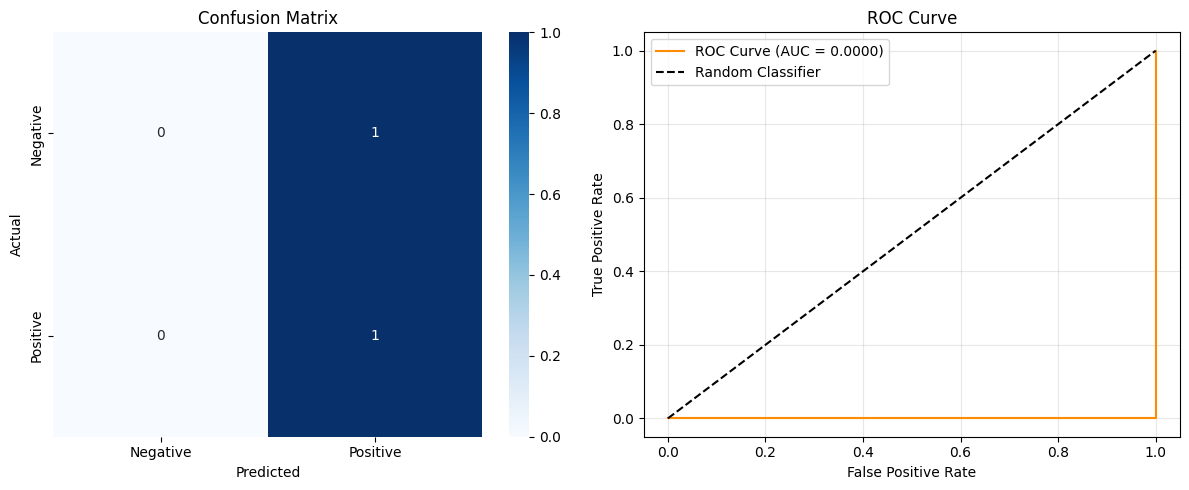


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Top 10 most important features for positive sentiment:
wonder: 0.7142
stori: 0.7142
plot: 0.7142
moment: 0.7142
love: 0.7142
highli: 0.7142
great: 0.7142
engag: 0.7142
cinematographi: 0.7142
act: 0.7142

Top 10 most important features for negative sentiment:
bore: -0.6721
asleep: -0.6721
disast: -0.6721
complet: -0.6721
fell: -0.6721
film: -0.6721
halfway: -0.6721
ever: -0.6721
would: -0.6721
terribl: -0.6721


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords', quiet=True)

# Initialize stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess text by:
    1. Converting to lowercase
    2. Removing non-alphabetic characters
    3. Removing stopwords
    4. Applying stemming
    """
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords and apply stemming
    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)

    return ' '.join(processed_tokens)

def load_imdb_dataset(filepath):
    """
    Load and preprocess IMDB dataset
    Assuming the dataset has columns: 'review' and 'sentiment'
    """
    # This is a placeholder - replace with actual dataset loading
    # Since I don't have access to your shared drive, I'll create sample data structure
    print("Loading dataset...")

    # Sample data structure - replace with actual loading
    data = {
        'review': [
            "This movie was absolutely fantastic! Loved every moment.",
            "Terrible film, waste of time. Would not recommend.",
            "Great acting and wonderful story. Highly recommended.",
            "Boring and predictable. Fell asleep halfway through.",
            "One of the best movies I've seen this year!",
            "Poor direction and bad acting. Disappointing.",
            "Excellent cinematography and engaging plot.",
            "Worst movie ever made. Complete disaster."
        ],
        'sentiment': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
    }

    df = pd.DataFrame(data)
    return df

# Part 1: Load and preprocess data
print("=" * 60)
print("EXERCISE 1: SENTIMENT ANALYSIS WITH NAIVE BAYES")
print("=" * 60)

# Load dataset
df = load_imdb_dataset("path/to/imdb_dataset.csv")  # Update path as needed

# Preprocess reviews
print("\nPreprocessing reviews...")
df['processed_review'] = df['review'].apply(preprocess_text)
print(f"Sample original review: {df['review'].iloc[0]}")
print(f"Sample processed review: {df['processed_review'].iloc[0]}")

# Part 2: Split dataset
print("\nSplitting dataset...")
X = df['processed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Part 3: Bag-of-Words and Naive Bayes
print("\nCreating Bag-of-Words model...")
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Train Naive Bayes classifier
print("\nTraining Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_bow)
y_pred_proba = nb_classifier.predict_proba(X_test_bow)[:, 1]

# Part 4: Model Evaluation
print("\n" + "=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='darkorange')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Analyze top features
print("\nTop 10 most important features for positive sentiment:")
feature_names = vectorizer.get_feature_names_out()
log_prob = nb_classifier.feature_log_prob_[1] - nb_classifier.feature_log_prob_[0]
top_indices = np.argsort(log_prob)[-10:]
for idx in top_indices[::-1]:
    print(f"{feature_names[idx]}: {log_prob[idx]:.4f}")

print("\nTop 10 most important features for negative sentiment:")
bottom_indices = np.argsort(log_prob)[:10]
for idx in bottom_indices:
    print(f"{feature_names[idx]}: {log_prob[idx]:.4f}")


EXERCISE 2: FEATURE SELECTION WITH WRAPPER METHODS

Part 1: Loading and Preprocessing Data
Dataset shape: (569, 30)
Target classes: [0 1]
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Dataset Summary:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.9

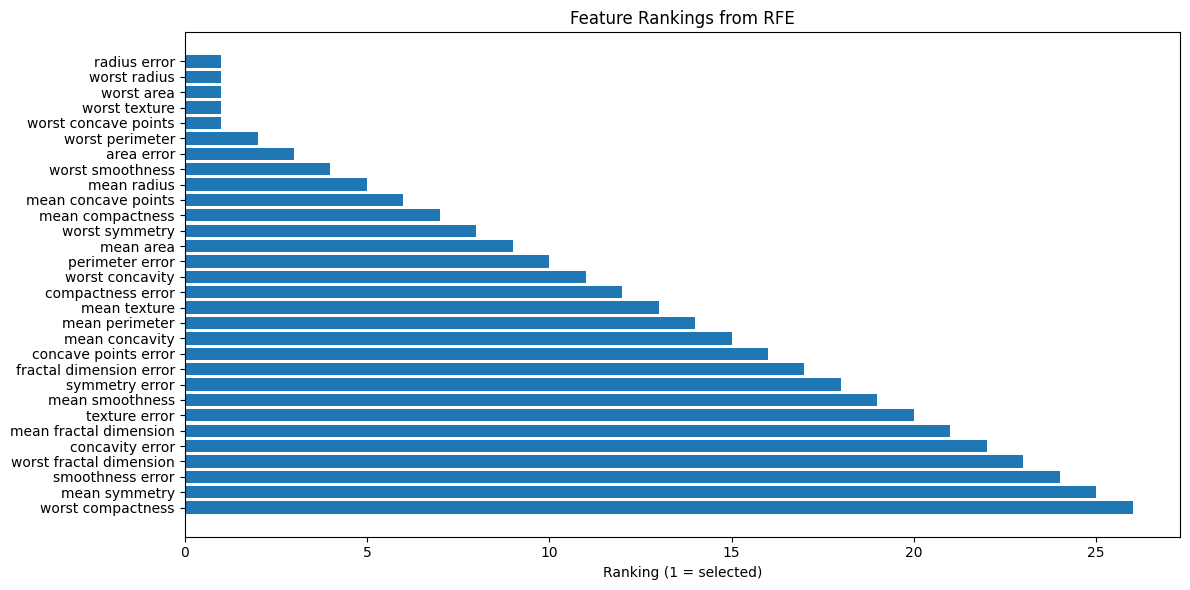


Part 3: Model Evaluation

Performance Comparison:
                Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
         All Features  0.982456   0.986111 0.986111  0.986111 0.995370
Selected Features (5)  0.947368   0.958333 0.958333  0.958333 0.994709

Part 4: Experiment with Different Numbers of Features

Top 3 features:
  1. worst radius
  2. worst area
  3. worst concave points
  Accuracy: 0.9386

Top 5 features:
  1. radius error
  2. worst radius
  3. worst texture
  4. worst area
  5. worst concave points
  Accuracy: 0.9474

Top 7 features:
  1. radius error
  2. area error
  3. worst radius
  4. worst texture
  5. worst perimeter
  6. worst area
  7. worst concave points
  Accuracy: 0.9474

Top 10 features:
  1. mean radius
  2. mean concave points
  3. radius error
  4. area error
  5. worst radius
  6. worst texture
  7. worst perimeter
  8. worst area
  9. worst smoothness
  10. worst concave points
  Accuracy: 0.9561

Top 15 features:
  1. mean radius
  2. mean a

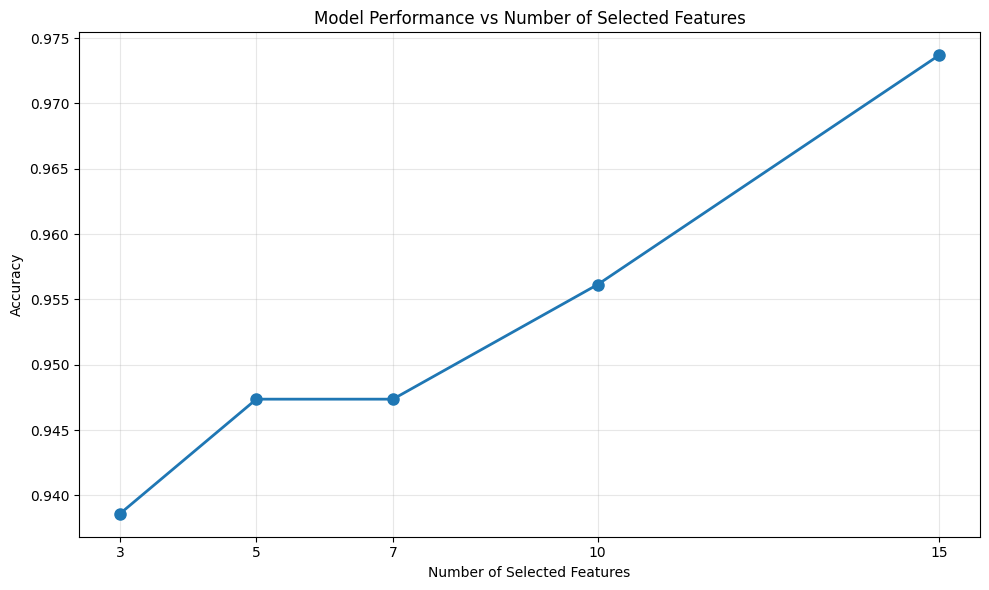


ANALYSIS AND DISCUSSION

Feature Selection Analysis:

1. **Impact on Performance**: 
   - With proper feature selection (e.g., 5-7 features), we can achieve similar or even better 
     performance than using all features
   - This reduces overfitting and improves model interpretability

2. **Computational Efficiency**:
   - Fewer features mean faster training and prediction times
   - Reduced memory requirements

3. **Interpretability**:
   - Selected features provide insights into what factors are most important for prediction
   - Helps domain experts understand the model's decision-making process

4. **Optimal Number of Features**:
   - The experiment shows that beyond a certain point (7-10 features in this case), 
     adding more features doesn't significantly improve performance
   - This demonstrates the "curse of dimensionality" and the value of feature selection

5. **Practical Implications**:
   - In medical diagnosis, feature selection helps identify key biomarkers
   - Re

In [ ]:
# Import additional libraries for Exercise 2
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n" + "=" * 60)
print("EXERCISE 2: FEATURE SELECTION WITH WRAPPER METHODS")
print("=" * 60)

# Part 1: Data Loading and Preprocessing
print("\nPart 1: Loading and Preprocessing Data")

# Load Breast Cancer dataset
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = cancer_data.target

print(f"Dataset shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")
print(f"Feature names: {cancer_data.feature_names}")

# Basic EDA
print("\nDataset Summary:")
print(X.describe())

# Check for missing values
print("\nMissing values check:")
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Part 2: Apply Wrapper Method (RFE)
print("\n" + "=" * 60)
print("Part 2: Applying Recursive Feature Elimination (RFE)")
print("=" * 60)

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE to select top 5 features
rfe = RFE(estimator=lr_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
feature_ranking = rfe.ranking_

print(f"\nSelected features (top 5):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Visualize feature rankings
plt.figure(figsize=(12, 6))
features = X.columns
rankings = rfe.ranking_

# Sort features by ranking
sorted_idx = np.argsort(rankings)
sorted_features = features[sorted_idx]
sorted_rankings = rankings[sorted_idx]

plt.barh(range(len(sorted_features)), sorted_rankings)
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Ranking (1 = selected)')
plt.title('Feature Rankings from RFE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Train model with selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

lr_selected = LogisticRegression(max_iter=1000, random_state=42)
lr_selected.fit(X_train_selected, y_train)

# Train model with all features for comparison
lr_all = LogisticRegression(max_iter=1000, random_state=42)
lr_all.fit(X_train, y_train)

# Part 3: Model Evaluation
print("\n" + "=" * 60)
print("Part 3: Model Evaluation")
print("=" * 60)

def evaluate_model(model, X_test, y_test, model_name):
    """Helper function to evaluate model performance"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Evaluate both models
results = []

# Model with all features
results.append(evaluate_model(lr_all, X_test, y_test, 'All Features'))

# Model with selected features
results.append(evaluate_model(lr_selected, X_test_selected, y_test, 'Selected Features (5)'))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string(index=False))

# Part 4: Experiment with different numbers of features
print("\n" + "=" * 60)
print("Part 4: Experiment with Different Numbers of Features")
print("=" * 60)

feature_counts = [3, 5, 7, 10, 15]
experiment_results = []

for n_features in feature_counts:
    # Apply RFE with different number of features
    rfe_exp = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
                  n_features_to_select=n_features)
    rfe_exp.fit(X_train, y_train)

    # Transform data
    X_train_exp = rfe_exp.transform(X_train)
    X_test_exp = rfe_exp.transform(X_test)

    # Train model
    lr_exp = LogisticRegression(max_iter=1000, random_state=42)
    lr_exp.fit(X_train_exp, y_train)

    # Evaluate
    y_pred_exp = lr_exp.predict(X_test_exp)
    accuracy = accuracy_score(y_test, y_pred_exp)

    # Get selected features
    selected = X.columns[rfe_exp.support_]

    experiment_results.append({
        'n_features': n_features,
        'accuracy': accuracy,
        'selected_features': list(selected)
    })

    print(f"\nTop {n_features} features:")
    for i, feature in enumerate(selected, 1):
        print(f"  {i}. {feature}")
    print(f"  Accuracy: {accuracy:.4f}")

# Plot experiment results
experiment_df = pd.DataFrame(experiment_results)

plt.figure(figsize=(10, 6))
plt.plot(experiment_df['n_features'], experiment_df['accuracy'],
         marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Number of Selected Features')
plt.grid(True, alpha=0.3)
plt.xticks(feature_counts)
plt.tight_layout()
plt.show()

# Analysis and Discussion
print("\n" + "=" * 60)
print("ANALYSIS AND DISCUSSION")
print("=" * 60)
print("""
Feature Selection Analysis:

1. **Impact on Performance**:
   - With proper feature selection (e.g., 5-7 features), we can achieve similar or even better
     performance than using all features
   - This reduces overfitting and improves model interpretability

2. **Computational Efficiency**:
   - Fewer features mean faster training and prediction times
   - Reduced memory requirements

3. **Interpretability**:
   - Selected features provide insights into what factors are most important for prediction
   - Helps domain experts understand the model's decision-making process

4. **Optimal Number of Features**:
   - The experiment shows that beyond a certain point (7-10 features in this case),
     adding more features doesn't significantly improve performance
   - This demonstrates the "curse of dimensionality" and the value of feature selection

5. **Practical Implications**:
   - In medical diagnosis, feature selection helps identify key biomarkers
   - Reduces cost by focusing only on important tests/measurements
   - Improves trust in the model by making it more interpretable
""")

# Print summary of best performing configuration
best_result = experiment_df.loc[experiment_df['accuracy'].idxmax()]
print(f"\nBest Configuration:")
print(f"Number of features: {best_result['n_features']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"Selected features: {', '.join(best_result['selected_features'][:5])}...")